In [1]:
import torch 
import matplotlib.pyplot as plt
import numpy as np
from dp_model.model_files.sfcn import SFCN
from dp_model import dp_loss as dpl
from dp_model import dp_utils as dpu

In [26]:
def give_rand_dist(n_bins,sort=True):
    shift=torch.randint(low=0,high=n_bins,size=[1])
    rand_vec=torch.rand(n_bins)
    if sort:
        rand_vec=torch.sort(rand_vec)[0]
    rand_dist=torch.roll(rand_vec,shifts=[shift])
    rand_dist=rand_dist/rand_dist.sum()
    return(rand_dist)

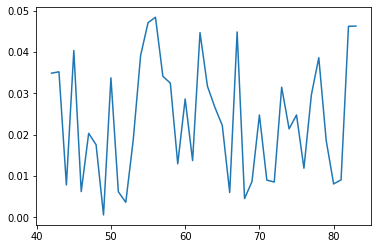

In [27]:
left_limit=42
right_limit=84
bins=np.arange(left_limit,right_limit)
n_bins=right_limit-left_limit
rand_dist=give_rand_dist(n_bins,sort=False)
plt.plot(bins,rand_dist) 

In [40]:
BIN_STEP=1
BIN_RANGE=[left_limit,right_limit]
SIGMA=1
#Set the label translater:
label_translater=dpu.give_label_translater({ 'type': 'label_to_bindist', 
                            'bin_step': BIN_STEP,
                            'bin_range': BIN_RANGE,
                            'sigma': SIGMA})

kl_loss=dpl.my_KLDivLoss
mae_loss=dpl.give_bin_eval(bin_centers=None)

Text(0.5, 1.0, 'With normalization + Enlarged borders')

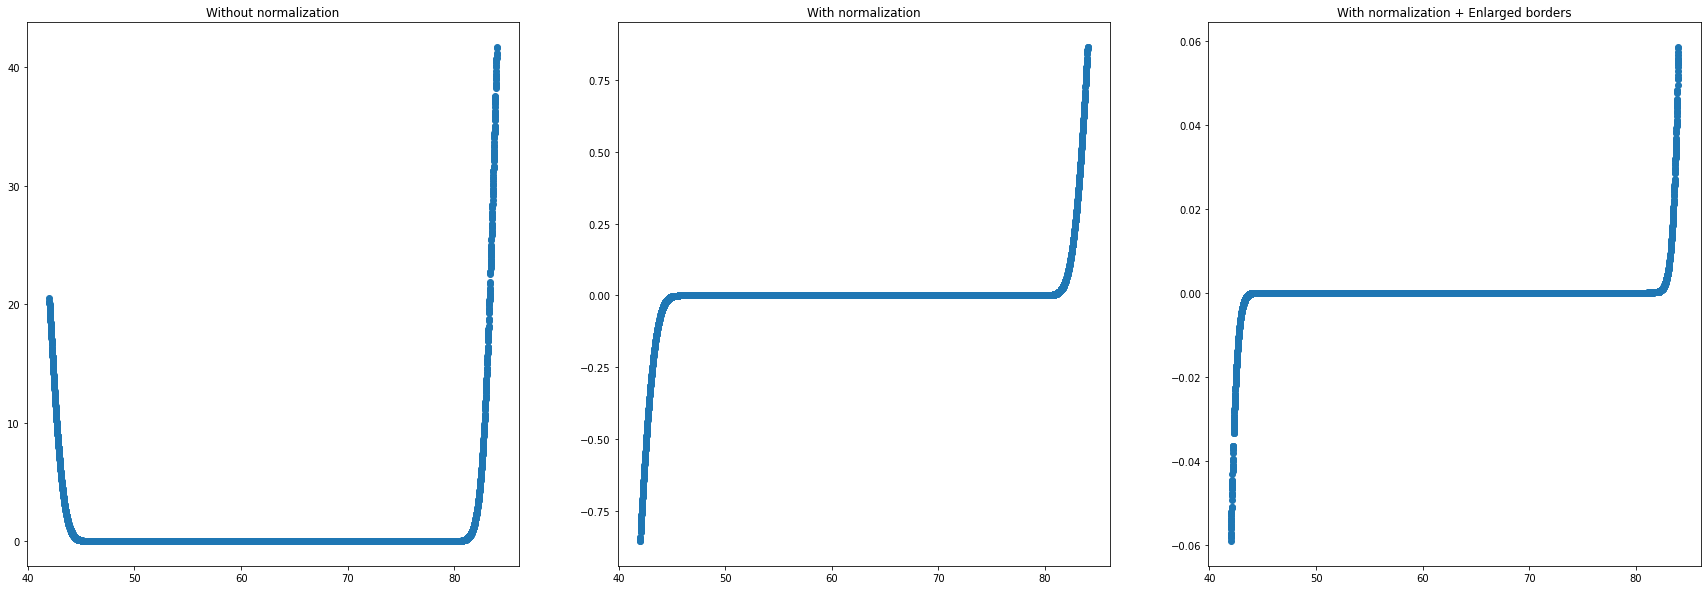

In [48]:
error_list=[]
label_list=[]
n_samples=10000
fig,ax=plt.subplots(ncols=3,figsize=(30,10))
#We control whether the label translater is really injective:
for it in range(n_samples):
    label=(right_limit - left_limit) * torch.rand(1) + left_limit
    base_dist,bin_centers=label_translater(label,sigma=SIGMA,normalize=False)
    #base_dist=base_dist/base_dist.sum()
    pred=dpl.pred_from_dist(torch.log(base_dist.unsqueeze(0)),bin_centers)
    error_list.append((label-pred).item())
    label_list.append(label.item())

ax[0].scatter(label_list,error_list)
ax[0].set_title("Without normalization")
error_list=[]
label_list=[]
for it in range(n_samples):
    label=(right_limit - left_limit) * torch.rand(1) + left_limit
    base_dist,bin_centers=label_translater(label,sigma=SIGMA)
    base_dist=base_dist/base_dist.sum()
    pred=dpl.pred_from_dist(torch.log(base_dist.unsqueeze(0)),bin_centers)
    error_list.append((label-pred).item())
    label_list.append(label.item())
    #print(base_dist.sum())

ax[1].scatter(label_list,error_list)
ax[1].set_title("With normalization")

error_list=[]
label_list=[]
label_translater_enl=dpu.give_label_translater({ 'type': 'label_to_bindist', 
                            'bin_step': 1,
                            'bin_range': [40,86],
                            'sigma': SIGMA})

for it in range(n_samples):
    label=(right_limit - left_limit) * torch.rand(1) + left_limit
    base_dist,bin_centers=label_translater_enl(label,sigma=SIGMA) 
    pred=dpl.pred_from_dist(torch.log(base_dist.unsqueeze(0)),bin_centers)
    error_list.append((label-pred).item())
    label_list.append(label.item())
    #print(base_dist.sum())

ax[2].scatter(label_list,error_list)
ax[2].set_title("With normalization + Enlarged borders")


In [211]:
n_samples=1000
kl_list=[]
mae_list=[]
for i in range(n_samples):
    rand_dist=give_rand_dist(n_bins,sort=False)
    log_rand_dist=torch.log(rand_dist)
    label=(right_limit - left_limit) * torch.rand(1) + left_limit
    base_dist,bin_centers=label_translater(label)
    base_dist=base_dist/base_dist.sum()
    kl_list.append(kl_loss(log_rand_dist.unsqueeze(0),base_dist.unsqueeze(0)))
    mae_list.append(mae_loss(log_rand_dist.unsqueeze(0),base_dist.unsqueeze(0),bin_centers))
    #print(label)
    #print(dpu.pred_from_dist(log_probs,bin_centers))

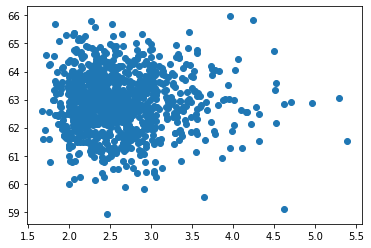

In [212]:
plt.scatter(kl_list,mae_list)